In [1]:
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()


In [3]:
#x_train_new , y_train_new = x_train[(y_train==0) | (y_train==8)], y_train[(y_train==0) | (y_train==8)]

In [20]:
x_train.shape

(60000, 28, 28)

In [5]:
#x_test_new , y_test_new = x_test[(y_test==0) | (y_test==8)] , y_test[(y_test==0)|(y_test==8)]

In [6]:
#x_test_new.shape

In [7]:
x_train_final=x_train.reshape((-1,784))
x_train_final.shape

(60000, 784)

In [8]:
x_test_final=x_test.reshape((-1,784))
x_test_final.shape

(10000, 784)

In [9]:
x_train_final = x_train_final / 255
x_test_final = x_test_final / 255

In [10]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(keras.layers.Dense(10,input_shape=(784,),activation='softmax'))

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [11]:
result=model.fit(
x=x_train_final,
y=y_train,
shuffle=True,
validation_data=(x_test_final,y_test),    
epochs=30,
batch_size=16)

Epoch 1/30
3750/3750 [==============================] - 4s 978us/step - loss: 0.7160 - accuracy: 0.7680 - val_loss: 0.5955 - val_accuracy: 0.8009
Epoch 2/30
3750/3750 [==============================] - 3s 866us/step - loss: 0.5332 - accuracy: 0.8235 - val_loss: 0.5367 - val_accuracy: 0.8181
Epoch 3/30
3750/3750 [==============================] - 3s 839us/step - loss: 0.4958 - accuracy: 0.8332 - val_loss: 0.5160 - val_accuracy: 0.8216
Epoch 4/30
3750/3750 [==============================] - 3s 867us/step - loss: 0.4756 - accuracy: 0.8390 - val_loss: 0.4986 - val_accuracy: 0.8272
Epoch 5/30
3750/3750 [==============================] - 3s 877us/step - loss: 0.4625 - accuracy: 0.8441 - val_loss: 0.4867 - val_accuracy: 0.8317
Epoch 6/30
3750/3750 [==============================] - 3s 832us/step - loss: 0.4523 - accuracy: 0.8465 - val_loss: 0.4809 - val_accuracy: 0.8342
Epoch 7/30
3750/3750 [==============================] - 3s 853us/step - loss: 0.4454 - accuracy: 0.8481 - val_loss: 0.4766 -

In [12]:
test=model.evaluate(x=x_test_final,y=y_test)

313/313 [==============================] - 0s 986us/step - loss: 0.4524 - accuracy: 0.8395


In [13]:
model.predict(x_test_final)

array([[1.7899965e-06, 6.5382591e-07, 1.0767187e-05, ..., 1.5278681e-01,
        6.1602416e-03, 7.3525310e-01],
       [3.7634029e-04, 1.4050596e-06, 8.0541265e-01, ..., 1.6100974e-12,
        7.9899386e-05, 3.6056391e-11],
       [5.1451327e-05, 9.9987388e-01, 7.5928201e-06, ..., 4.4179561e-08,
        4.1589291e-07, 1.7943670e-10],
       ...,
       [5.9242528e-02, 6.1526439e-06, 1.9789191e-03, ..., 1.6682019e-04,
        5.9679991e-01, 2.8038976e-06],
       [3.4001355e-06, 9.9935704e-01, 6.2814756e-06, ..., 4.7022684e-07,
        4.0979859e-07, 3.9650803e-07],
       [5.6699588e-05, 6.7134424e-05, 4.1678851e-04, ..., 4.3973472e-02,
        8.6122695e-03, 2.1678761e-03]], dtype=float32)

Text(0.5, 0, 'epoch')

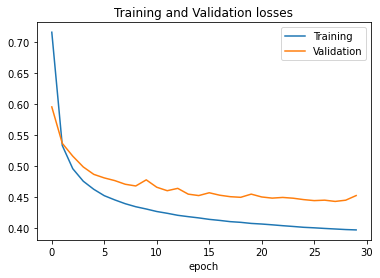

In [14]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

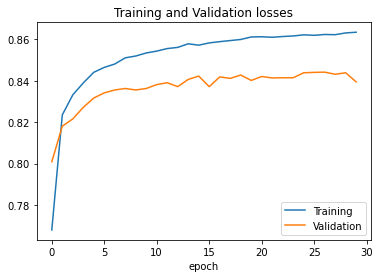

In [15]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')


the number is  2 

[[1.7798568e-01 5.3002161e-04 5.4891631e-02 7.8161787e-03 8.4377468e-02
  9.5538635e-06 6.7089409e-01 1.5754391e-07 3.4903099e-03 4.9938144e-06]]


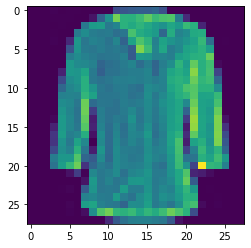

In [18]:
print('the number is ',y_test[1],'\n')#2,3,7,8,9
idx=[4]
print(model.predict(x_test_final[idx,:].reshape(1,-1)))
plt.imshow(x_test_final[idx,:].reshape(28,28))